## Import Libraries

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

%matplotlib inline
plt.style.use('seaborn-whitegrid')

## Load Data

In [0]:
!git clone https://github.com/greenteaAde/toxic_comment_classification.git

import os 
os.chdir('toxic_comment_classification/')

Cloning into 'toxic_comment_classification'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 3), reused 11 (delta 2), pack-reused 0
Unpacking objects: 100% (15/15), done.


## Check Data

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_y = pd.read_csv("test_labels.csv")

In [0]:
print(train.shape)
train.head()

(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
train[train.identity_hate == 1].iloc[:,1].head()

42     You are gay or antisemmitian? \n\nArchangel WH...
105           A pair of jew-hating weiner nazi schmucks.
176    I think that your a Fagget get a oife and burn...
218    Kill all niggers. \n\nI have hard, that others...
238    u r a tw@ fuck off u gay boy.U r smelly.Fuck u...
Name: comment_text, dtype: object

## Add label 'None' to non-toxic data

In [0]:
train_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['None'] = train.apply(lambda x: 1 if x[train_classes].max() == 0 else 0, axis = 1)
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,None
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [0]:
print(test.shape)
test.head()

(153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


## Data Frequency

In [0]:
train_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'None']
label_count = train[train_classes].sum()
label_count

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
None             143346
dtype: int64

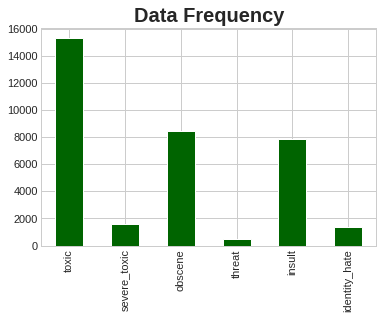

In [0]:
label_count[:-1].plot(kind = 'bar',color = 'darkgreen')
plt.title('Data Frequency', fontweight = 'bold', fontsize = 20)
plt.show()

## Data Correlation Matrix

In [0]:
train_groupby = train.groupby(train_classes).size()\
                                            .sort_values(ascending = False)\
                                            .reset_index()\
                                            .rename(columns = {0:'count'})
train_groupby.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,None,count
0,0,0,0,0,0,0,1,143346
1,1,0,0,0,0,0,0,5666
2,1,0,1,0,1,0,0,3800
3,1,0,1,0,0,0,0,1758
4,1,0,0,0,1,0,0,1215


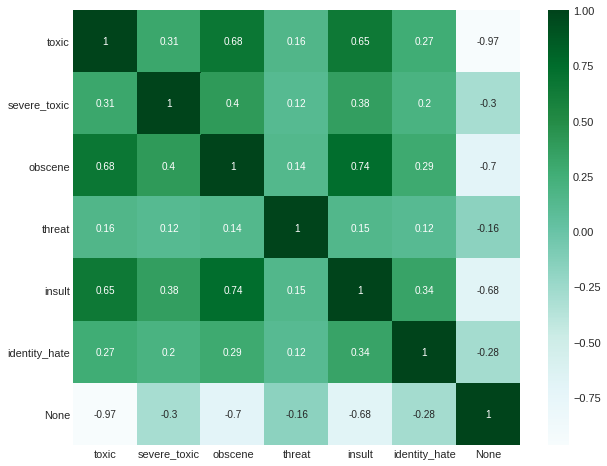

In [131]:
corrmat = train[train_classes].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap="BuGn")

## Word Cloud

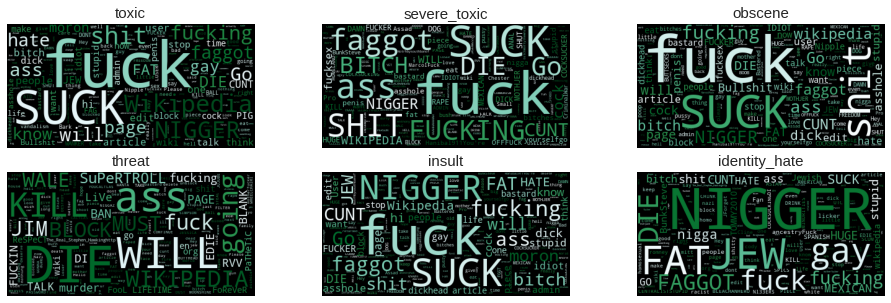

In [0]:
fig, ax = plt.subplots(2,3, figsize = (16,5))
n = 0
for i in range(2):
    for j in range(3):
        index = train_classes[n+j]
        text = train[train[index] == 1].comment_text
        word = pd.Series(text).str.cat(sep = ' ')
        wordcloud = WordCloud(collocations = False).generate(word)
        ax[i,j].imshow(wordcloud.recolor(colormap = "BuGn_r"))
        ax[i,j].axis('off')
        ax[i,j].set_title(f'{index}', size = 15)
    n = 3